<a href="https://colab.research.google.com/github/sai1519/My-projects-and-programs/blob/Machine-Learning/Saishta's_Assignment_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Program 1

### We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”, identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing.

In [ ]:
# Loading and reading the data.
import pandas as pd
data = pd.read_csv("voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
# Identifying the target variable.
y = data["label"]

In [ ]:
# Converting the categorical data of y into numerical data by using "Onr hot encoding".
import numpy as np
from sklearn.preprocessing import OneHotEncoder
arr = np.array(y).reshape(-1,1) # converted y into an array because one hot encoder expects a 2D array as input.
ohe = OneHotEncoder()
encoding= ohe.fit_transform(arr)
encoding

<3168x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3168 stored elements in Compressed Sparse Row format>

In [ ]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
# Repalcing the original label column with the encoding one.
encoding_df=pd.DataFrame(encoding.toarray(),columns=ohe.get_feature_names_out(["target"]))
data.drop(columns=["label"],inplace=True)

In [ ]:
encoding_df.columns

Index(['target_female', 'target_male'], dtype='object')

In [ ]:
encoding_df["target_female"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3163    1.0
3164    1.0
3165    1.0
3166    1.0
3167    1.0
Name: target_female, Length: 3168, dtype: float64

In [ ]:
encoding_df["target_male"]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3163    0.0
3164    0.0
3165    0.0
3166    0.0
3167    0.0
Name: target_male, Length: 3168, dtype: float64

In [ ]:
data["target"]= encoding_df[ "target_male"]
data.loc[encoding_df["target_female"]==1,"target"]=0

In [ ]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'target'],
      dtype='object')

In [ ]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,target
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1.0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1.0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1.0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1.0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1.0


In [ ]:
data["target"].unique()

array([1., 0.])

In [ ]:
xx = data.drop(columns="target")
yy = data["target"]

# splitting the data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xx,yy, test_size=0.2, random_state=1)

# Program 2

### Fit a logistic regression model and measure the accuracy on the test set.

In [ ]:
# Fitting the logistic regression.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Making prediction on the test data.
y_pred = lr.predict(x_test)

In [ ]:
# Evaluating our model.
from sklearn.metrics import accuracy_score
evaluation = accuracy_score(y_test,y_pred)
evaluation

0.8990536277602523

# Program 3

### Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Computinting the correlation.
cm = data.corr()
cm.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,target
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906


In [ ]:
# identifying highly correlated predictors.
hc = cm[abs(cm)>0.7]
hc

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,target
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,NaN,NaN,NaN,NaN,-0.784332,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sd,-0.739039,1.000000,NaN,-0.846931,NaN,0.874660,NaN,NaN,0.716620,0.838086,...,-0.739039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median,0.925445,NaN,1.000000,0.774922,0.731849,NaN,NaN,NaN,NaN,NaN,...,0.925445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q25,0.911416,-0.846931,0.774922,1.000000,NaN,-0.874189,NaN,NaN,NaN,-0.766875,...,0.911416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q75,0.740997,NaN,0.731849,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.740997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IQR,NaN,0.874660,NaN,-0.874189,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skew,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.97702,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kurt,NaN,NaN,NaN,NaN,NaN,NaN,0.97702,1.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp.ent,NaN,0.716620,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.866411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sfm,-0.784332,0.838086,NaN,-0.766875,NaN,NaN,NaN,NaN,0.866411,1.000000,...,-0.784332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


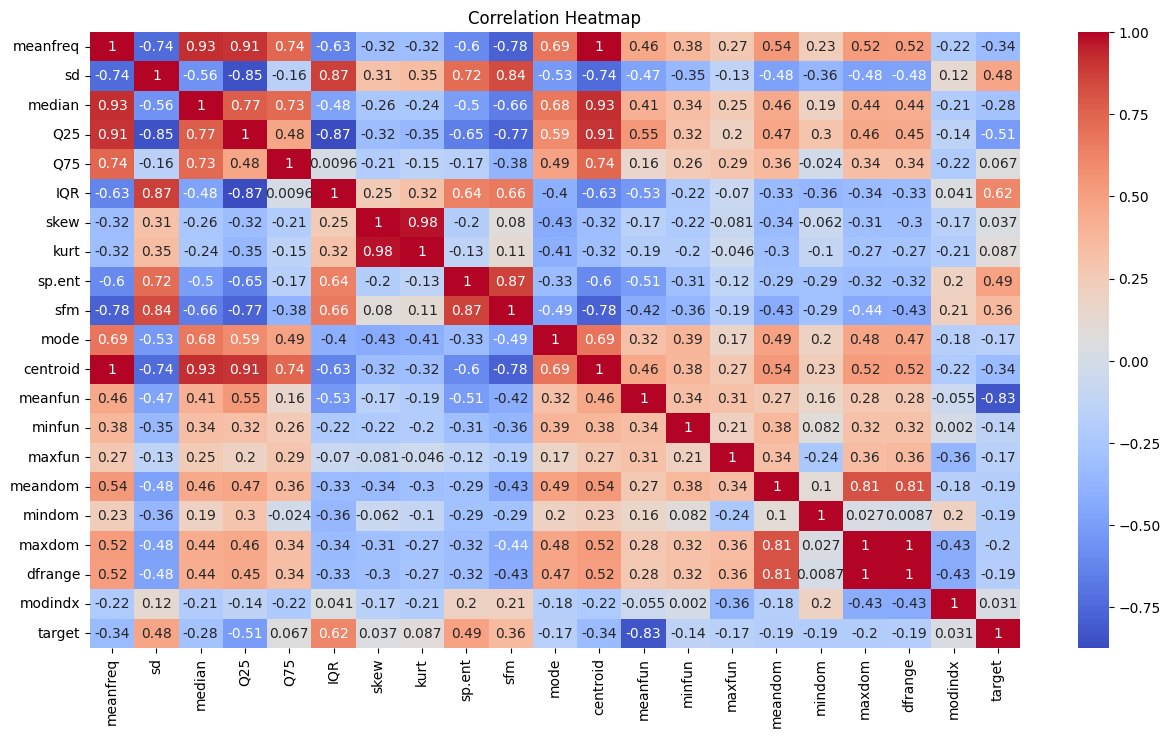

In [ ]:
# Creating a heatmap.
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot =True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Displaying the highly correlated predictors.
print("Highly correlated predictors: ")
for i in hc.columns:
  cc = hc[i].dropna().index.tolist()
  cc.remove(i)
  if len(cc)>0:
    print(f"{i} : {','.join(cc)}")

Highly correlated predictors: 
meanfreq : sd,median,Q25,Q75,sfm,centroid
sd : meanfreq,Q25,IQR,sp.ent,sfm,centroid
median : meanfreq,Q25,Q75,centroid
Q25 : meanfreq,sd,median,IQR,sfm,centroid
Q75 : meanfreq,median,centroid
IQR : sd,Q25
skew : kurt
kurt : skew
sp.ent : sd,sfm
sfm : meanfreq,sd,Q25,sp.ent,centroid
centroid : meanfreq,sd,median,Q25,Q75,sfm
meanfun : target
meandom : maxdom,dfrange
maxdom : meandom,dfrange
dfrange : meandom,maxdom
target : meanfun


# Program 4

### Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model.


In [ ]:
# Droping the sd column.
data.drop(columns=["sd"],inplace= True)

In [ ]:
# splitting the data.
x1 = data.drop(columns=["target"])
y1= data["target"]
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=2)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred2 = lr.predict(x_test)

In [ ]:
evaluation2 = accuracy_score(y_test,y_pred)
evaluation2

0.5

In [ ]:
# We can cleary see that by dropping sd column the accuracy score droped from 89% to 50%